In [1]:
from netCDF4 import Dataset
import pandas as pd
from cartoplot import cartoplot
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
import numpy.ma as ma

/tmp/ipykernel_3559/372960555.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
edge_dir = '/home/robbie/Dropbox/arctex/code/edge'

with Dataset(f'{edge_dir}/ice_edge_nh_ease2-125_cdr-v3p0_200607011200.nc') as d:
    it_lon = np.array(d['lon'])
    it_lat = np.array(d['lat'])
    
    critical_lon = 90
    
    lon2d_greater = ma.masked_greater(np.array(it_lon), critical_lon-0.01)
    lon2d_lesser = ma.masked_less(np.array(it_lon), critical_lon)
    
    lat2d_greater = ma.MaskedArray(np.array(it_lat), mask=lon2d_greater.mask)
    lat2d_lesser = ma.MaskedArray(np.array(it_lat), mask=lon2d_lesser.mask)

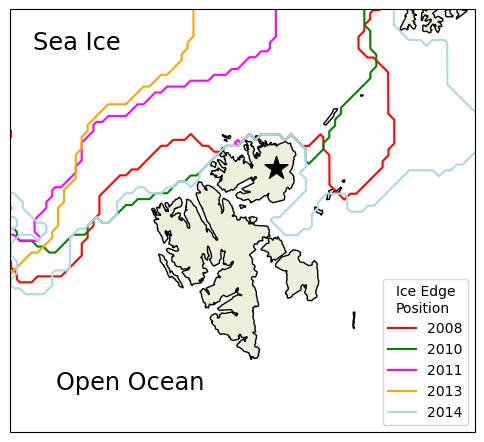

In [8]:

fig = plt.figure(figsize=(6,6))
proj = ccrs.NorthPolarStereo()
ax = plt.axes(projection=proj)

month = '09'

ax.set_extent([-180, 180,90, 65], ccrs.PlateCarree())

ax.set_extent([-0.09e+06, 0.9e6, -1.6e6, -0.7e6], crs=ccrs.NorthPolarStereo()) 

ax.add_feature(cartopy.feature.LAND, edgecolor='black',zorder=1)


for year, color in zip([2008,2010,2011,2013,2014],['r','g','magenta','orange','lightblue','darkblue',]):

    with Dataset(f'{edge_dir}/ice_edge_nh_ease2-125_cdr-v3p0_{year}{month}011200.nc') as d:
        
        it = np.array(d['ice_edge'][0]).astype(np.float32)

        it[((it_lat>75)&(it_lat<80))&((it_lon>10)&(it_lon<16))]=0
        it[((it_lat>79)&(it_lat<80))&((it_lon>20)&(it_lon<22))]=0
        it[((it_lat>77.5)&(it_lat<78.5))&((it_lon>21)&(it_lon<25))]=0

        
        it[it<=1] = 0
        it[it>0] = 1
        ice_type_lesser = ma.MaskedArray(it, mask=lon2d_lesser.mask)
        ice_type_greater = ma.MaskedArray(it, mask=lon2d_greater.mask)
        
        
        
        cont_less = ax.contour(lon2d_lesser,
                          lat2d_lesser,
                          ice_type_lesser,
                          levels=[0.5],
                          transform=ccrs.PlateCarree(),
                          colors=[color])
        
        cont_Great = ax.contour(lon2d_greater,
                          lat2d_greater,
                          ice_type_greater,
                          levels=[0.5],
                          colors=[color],
                          transform=ccrs.PlateCarree())

        plt.plot([],[],color=color,label=year)

    # break

ax.annotate('Sea Ice',xy=(0.05,0.95),va='top',xycoords='axes fraction',fontsize='xx-large')
ax.annotate('Open Ocean',xy=(0.1,0.1),xycoords='axes fraction',fontsize='xx-large')
ax.scatter(24.6,79.8,transform=ccrs.PlateCarree(),marker='*',s=302,c='k')
plt.legend(title='Ice Edge\nPosition',loc='lower right')
fig.savefig('Ice_Edge.png',dpi=400,bbox_inches='tight')